In [ ]:
#load all modules for Parkinson's Disease Detection Project
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("/content/parkinsons data.csv")


In [ ]:
df.info

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2.5

In [ ]:
#extract features but we don't want 'name' and 'status' columns
#so we will drop these two columns and store remainings
#axis 1 is for columns
features = df.drop(['name','status'],axis=1)

#our target data will be 'status'
target = df.loc[:,'status']

In [ ]:
#scale all the features data in the range between -1,1
scaler= MinMaxScaler((-1,1))
features_c=scaler.fit_transform(features)

In [ ]:
#split the dataset into training and testing sets where 20% data for testing purpose. 
x_train,x_test,y_train,y_test = train_test_split(features_c, target ,
test_size=0.2,random_state=10)

In [ ]:
#initialize the random forest classifier and fit the datas
model= RandomForestClassifier(random_state=2)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

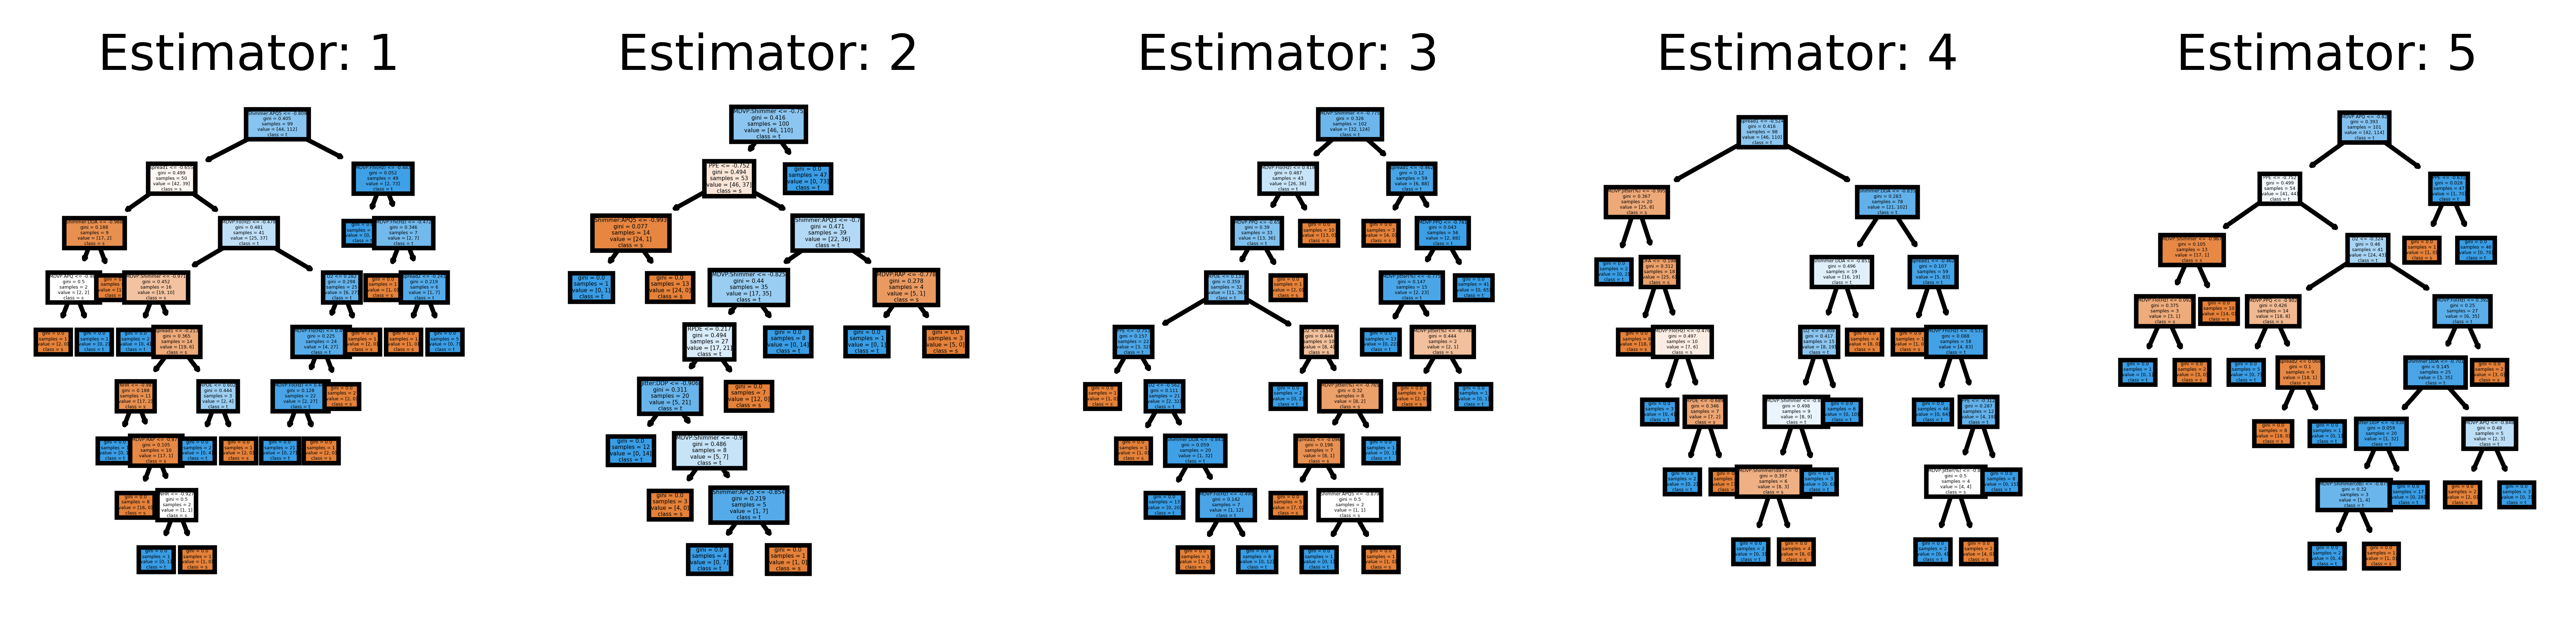

In [ ]:
#plot the RandomForestClassifier’s first 5 trees 
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],feature_names= features.columns,
 class_names= 'status',filled = True,ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)
fig.savefig('Random Forest 5 Trees.png')

In [ ]:
#predict the output for x_test
y_pred=model.predict(x_test)

#calculate accuracy,root mean squared error
print('Accuracy :',accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy : 0.9743589743589743
Mean Absolute Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713


In [ ]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))
#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Parkinson's Disease Detected" if model.predict(in_data_sca) else "No Parkinson's Disease Detected")

122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
Parkinson's Disease Detected
